In [137]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from statsmodels.stats.outliers_influence import variance_inflation_factor
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [138]:
# Load the dataset
# Assuming the dataset is in a CSV file named 'car_data.csv'
data = pd.read_csv('car.csv')

In [139]:
# Exploring dataset
print(data.shape)
print(data.dtypes)

(398, 8)
MPG             float64
Cylinders         int64
Displacement    float64
Horsepower       object
Weight            int64
Acceleration    float64
Model Year        int64
US Made           int64
dtype: object


In [140]:
# Converting the 'Horsepower' column to numeric format
data["Horsepower"] = pd.to_numeric(data["Horsepower"], errors = "coerce")

print(data.dtypes)

MPG             float64
Cylinders         int64
Displacement    float64
Horsepower      float64
Weight            int64
Acceleration    float64
Model Year        int64
US Made           int64
dtype: object


In [141]:
# Get the summary statistics for all the columns
round(data.describe(),2)

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,US Made
count,398.00,398.00,398.00,392.00,398.00,398.00,398.00,398.00
mean,23.51,5.45,193.43,104.47,2970.42,15.57,76.01,0.63
std,7.82,1.70,104.27,38.49,846.84,2.76,3.70,0.48
min,9.00,3.00,68.00,46.00,1613.00,8.00,70.00,0.00
25%,17.50,4.00,104.25,75.00,2223.75,13.82,73.00,0.00
50%,23.00,4.00,148.50,93.50,2803.50,15.50,76.00,1.00
75%,29.00,8.00,262.00,126.00,3608.00,17.18,79.00,1.00
max,46.60,8.00,455.00,230.00,5140.00,24.80,82.00,1.00


In [142]:
# Check for missing values in the dataset
data.isna().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model Year      0
US Made         0
dtype: int64

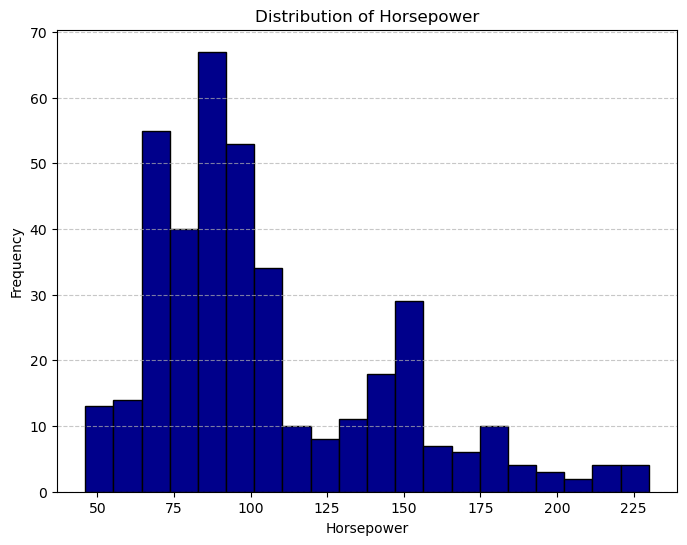

In [143]:
# View distribution of the variable 'Horsepower' using histogram
plt.figure(figsize=(8, 6))
plt.hist(data['Horsepower'], bins=20, color='darkblue', edgecolor='black')
plt.title('Distribution of Horsepower')
plt.xlabel('Horsepower')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [144]:
# Treating '?' values in the 'horsepower' column
# The values in the field are not normally distributed
# Imputing the values with median

HP_median = data["Horsepower"].median()
data["Horsepower"].fillna(HP_median, inplace = True)

# Test if there any missing values remaining in the column
print(data["Horsepower"].isna().sum() == 0)

True


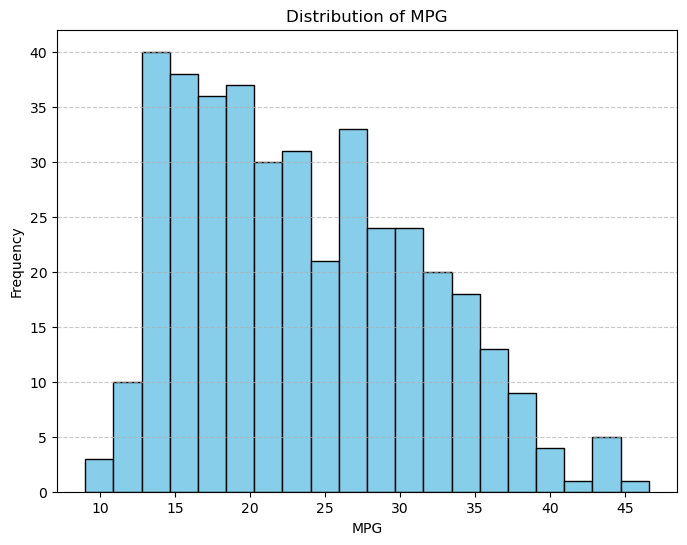

In [145]:
# View distribution of the variable 'MPG' using histogram
plt.figure(figsize=(8, 6))
plt.hist(data['MPG'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of MPG')
plt.xlabel('MPG')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [146]:
# Identify outliers in each column
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

filtered = ((data < (lower_bound)) | (data > (upper_bound)))
filtered.sum()

MPG              1
Cylinders        0
Displacement     0
Horsepower      11
Weight           0
Acceleration     7
Model Year       0
US Made          0
dtype: int64

IndexError: index 2 is out of bounds for axis 0 with size 2

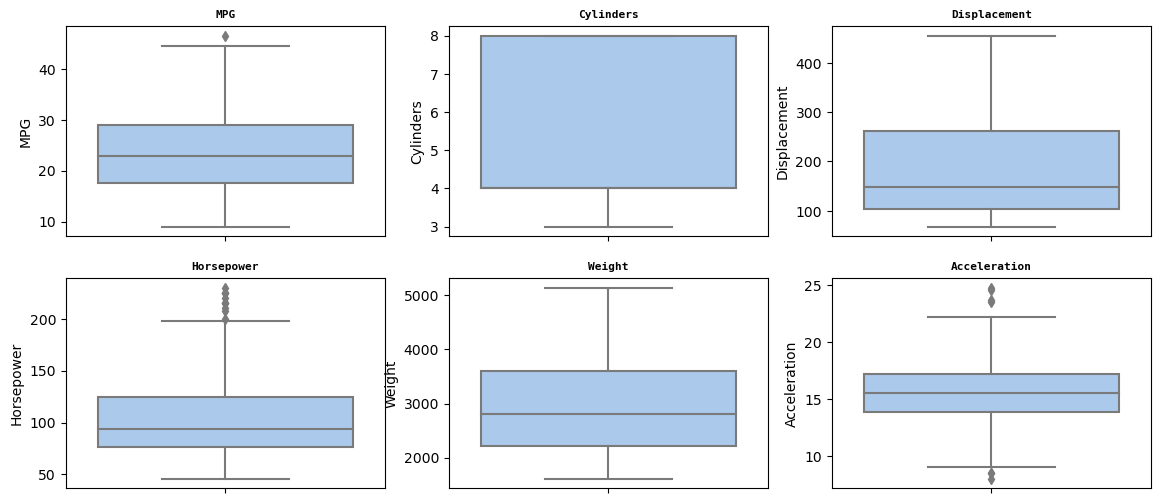

In [147]:
# Viewing outliers using box plots
fig, ax = plt.subplots(2, 3, figsize = (14, 6))

for i, col in enumerate(data.columns):
    g = sns.boxplot(data = data, y = col, ax = ax[i // 3, i % 3], palette = "pastel")
    g.set_title(col, weight = "bold", fontsize = 8, fontname = "monospace")

In [148]:
# View the outlier datapoints 

print(data.loc[filtered["Acceleration"]])
print(data.loc[filtered["MPG"]])
print(data.loc[filtered["Horsepower"]])

      MPG  Cylinders  Displacement  Horsepower  Weight  Acceleration  \
7    14.0          8         440.0       215.0    4312           8.5   
9    15.0          8         390.0       190.0    3850           8.5   
11   14.0          8         340.0       160.0    3609           8.0   
59   23.0          4          97.0        54.0    2254          23.5   
299  27.2          4         141.0        71.0    3190          24.8   
326  43.4          4          90.0        48.0    2335          23.7   
394  44.0          4          97.0        52.0    2130          24.6   

     Model Year  US Made  
7            70        1  
9            70        1  
11           70        1  
59           72        0  
299          79        0  
326          80        0  
394          82        0  
      MPG  Cylinders  Displacement  Horsepower  Weight  Acceleration  \
322  46.6          4          86.0        65.0    2110          17.9   

     Model Year  US Made  
322          80        0  
      MP

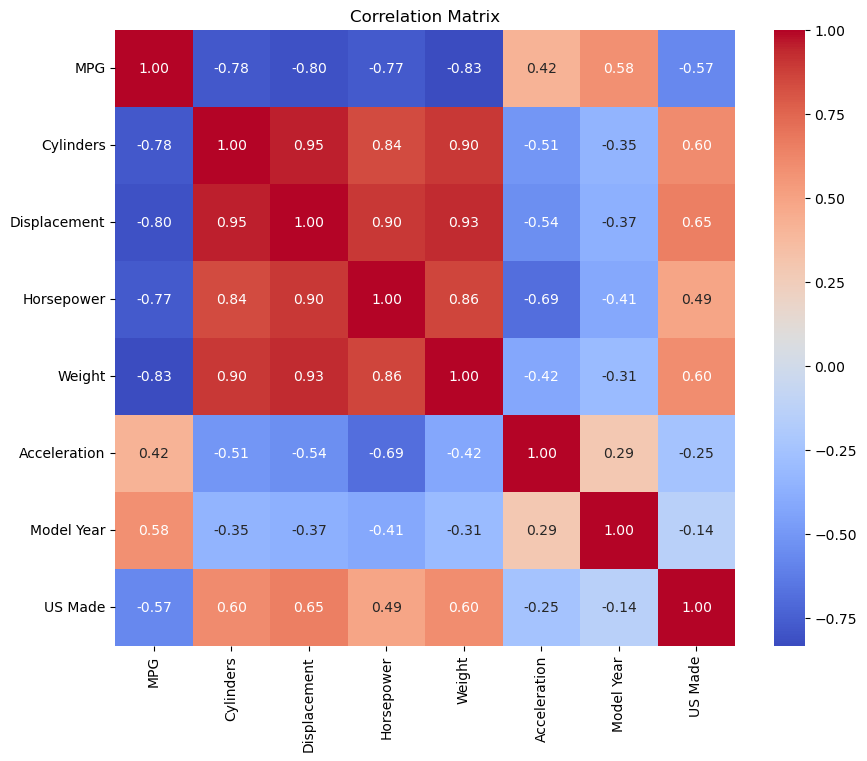

In [149]:
# Plotting the correlation matrix
correlation_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [150]:
# Get the correlation values for the target variable
MPG_correlation = correlation_matrix['MPG']

# Display the correlation values
print(f"Correlation values with {'MPG'}:\n")
print(MPG_correlation)

Correlation values with MPG:

MPG             1.000000
Cylinders      -0.775396
Displacement   -0.804203
Horsepower     -0.773453
Weight         -0.831741
Acceleration    0.420289
Model Year      0.579267
US Made        -0.568192
Name: MPG, dtype: float64


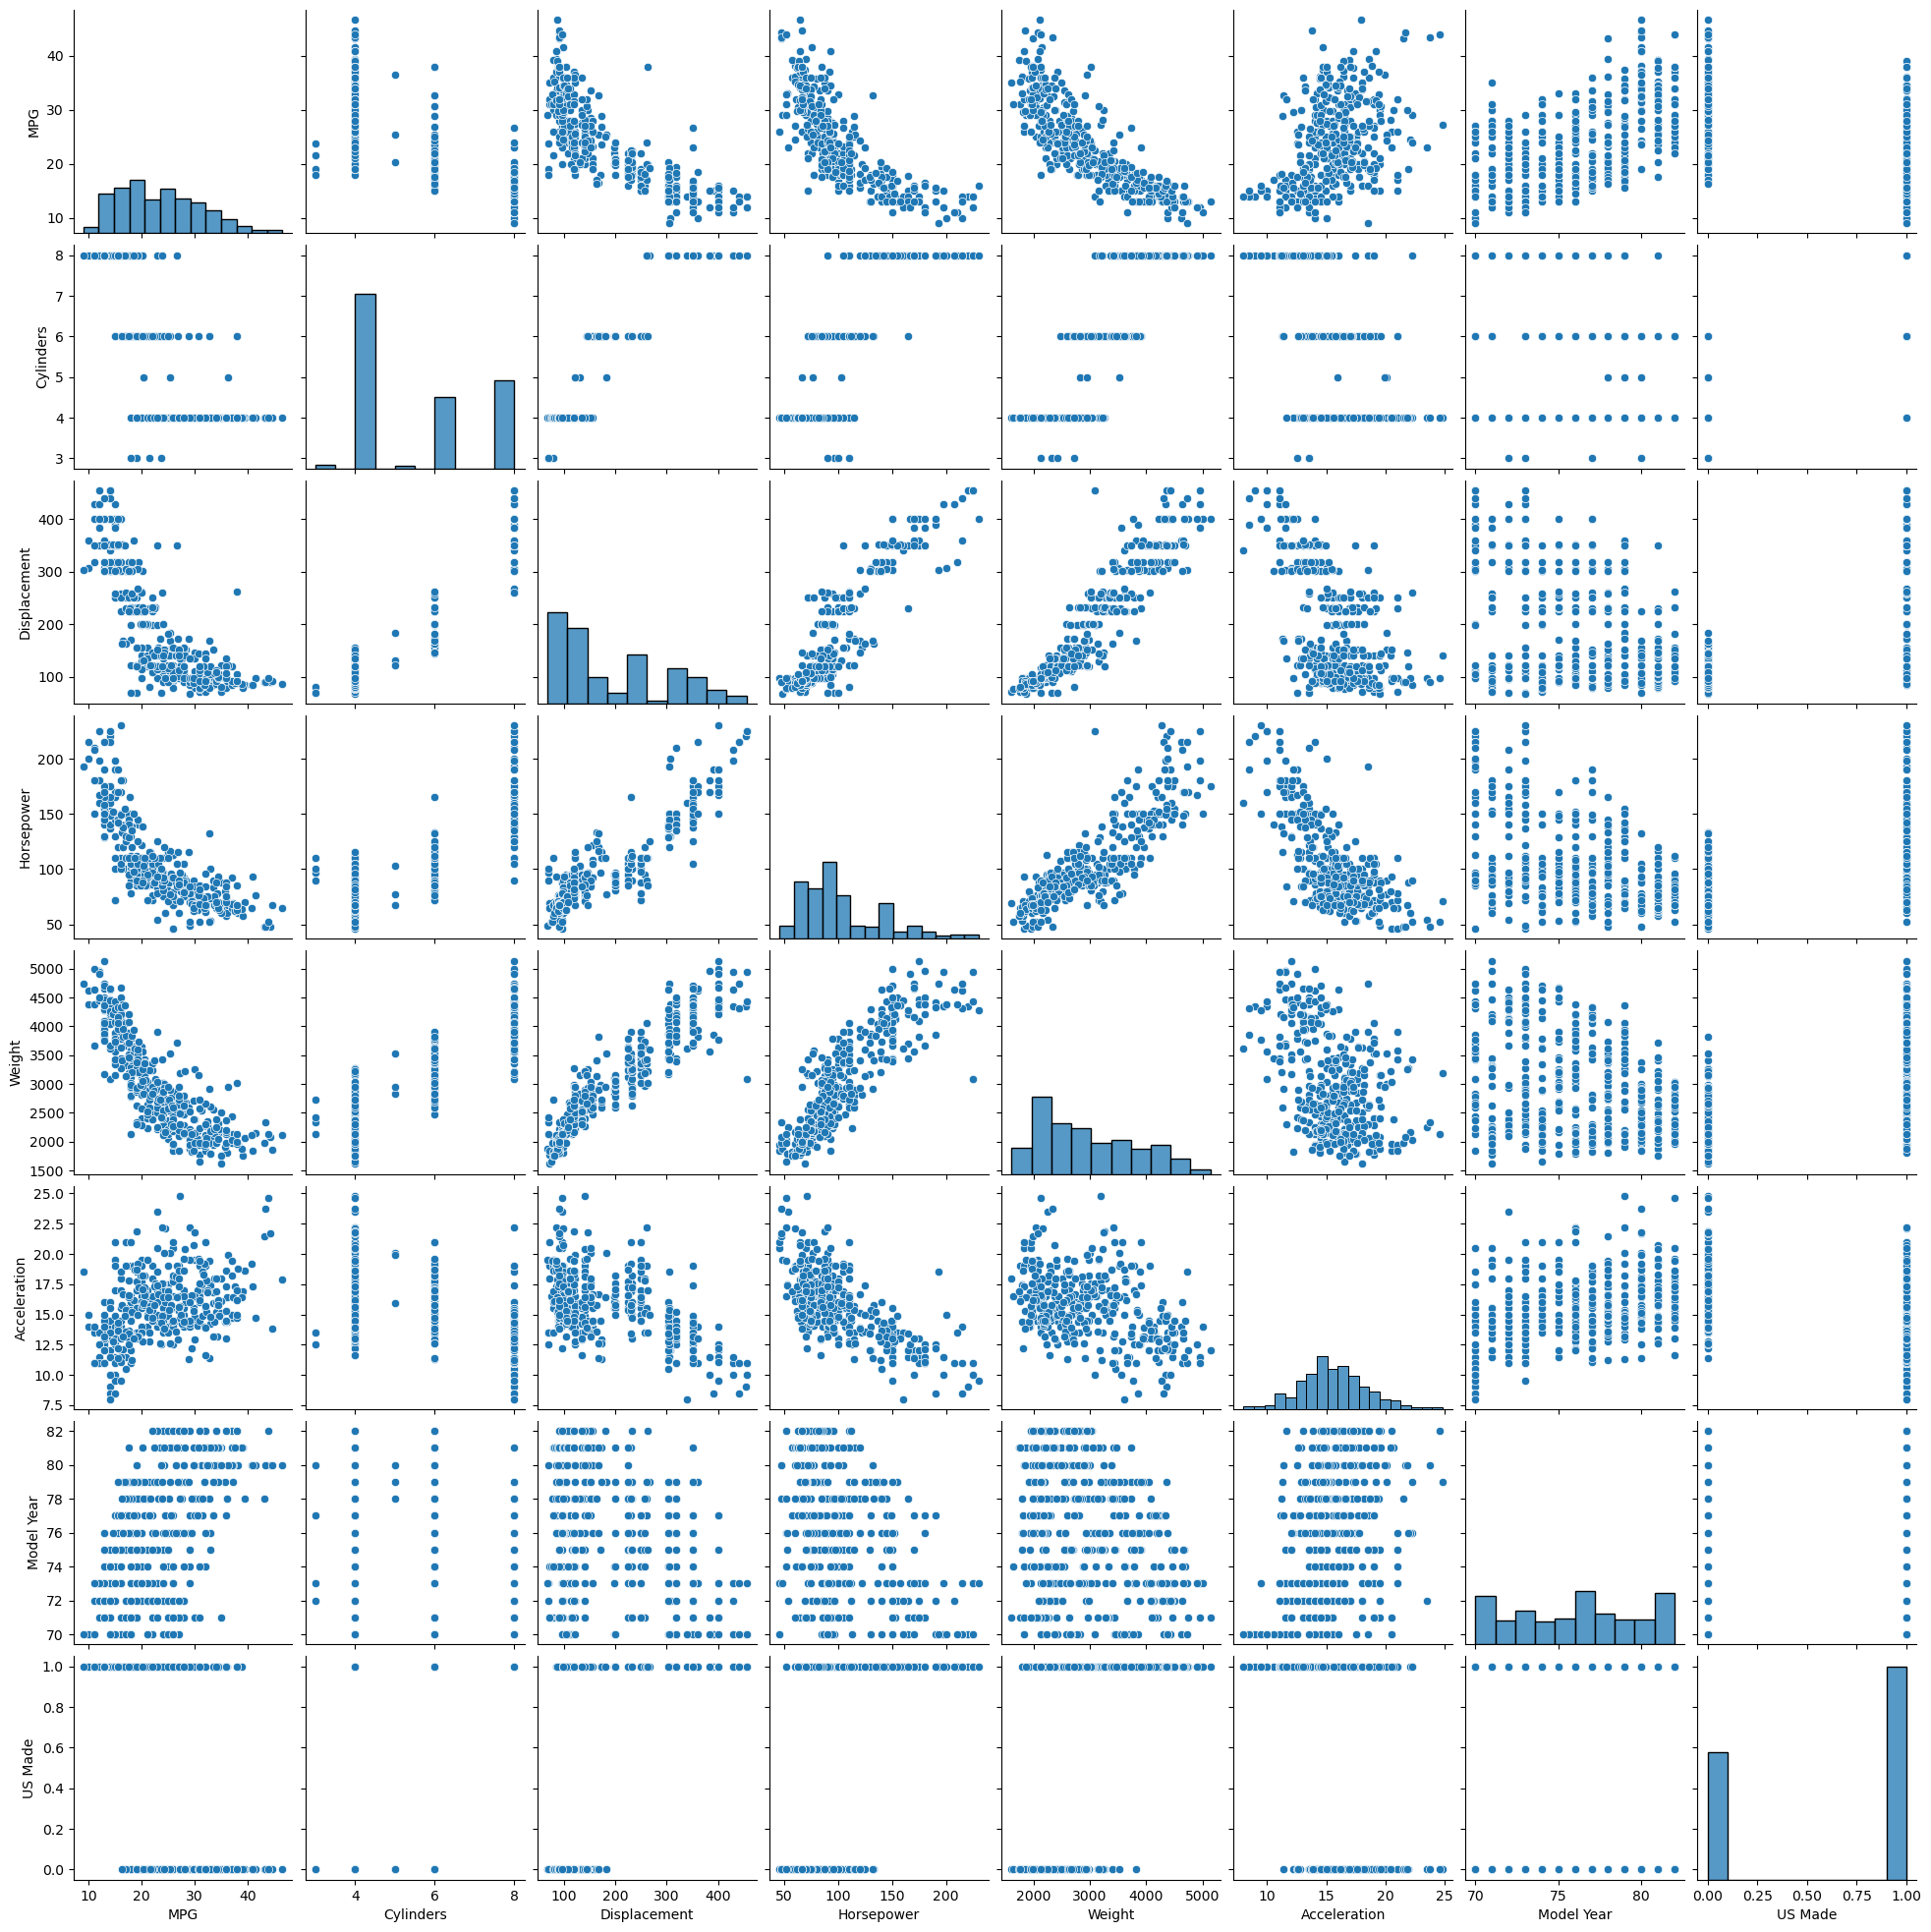

In [151]:
# Study the relationship between the variables in the dataset
# Pair plot for numerical features
sns.pairplot(data)
plt.show()

In [152]:
# Assuming 'MPG' is the target variable and 'X' are the features
X = data.drop('MPG', axis=1)
y = data['MPG']

In [153]:
# Split the data into training and testing sets (80-20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [154]:
# Data is being normalised to remove bias due to numeric variables with larger values
# Scaling values to a common range.

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = pd.DataFrame(scaler.transform(X_train))
X_test = pd.DataFrame(scaler.transform(X_test))
 
# Scaling the sets y sets separately
scaler2 = MinMaxScaler()
scaler2.fit(y_train)
y_train = pd.DataFrame(scaler2.transform(y_train))
y_test = pd.DataFrame(scaler2.transform(y_test))

ValueError: Expected 2D array, got 1D array instead:
array=[16.  27.  37.  36.1 23.  14.  32.8 29.9 20.  12.  15.5 23.7 24.  36.
 19.  38.  29.  21.5 27.9 14.  36.1 22.  18.  17.  18.  14.  26.  13.
 33.  37.  32.  28.  19.2 32.  27.4 20.  26.  20.6 37.3 16.2 15.  21.
 21.  20.5 21.  25.4 34.1 27.  36.  31.6 38.1 32.  40.8 19.  20.  22.
 17.5 35.1 30.5 33.7 19.  14.  15.5 15.  22.5 29.  23.  18.  25.5 24.
 14.  16.5 20.3 26.  15.  33.8 11.  28.  19.  30.  27.2 16.5 29.  20.
 15.  17.5 18.  24.  20.2 13.  12.  20.  13.  26.  34.5 18.  18.5 13.
 26.  18.  31.  24.  11.  19.4 32.9 31.5 19.1 24.  20.  28.  29.  14.
 35.  29.5 23.6 15.5 20.6 34.2 25.  36.4 22.3 19.  19.8 31.  14.  14.
 43.4 26.  33.5 19.  22.  27.2 32.7 29.  17.6 23.  34.  17.6 30.7 21.
 38.  16.  15.  20.  29.  32.  18.  32.  15.  16.  34.  10.  19.  28.4
 15.  32.3 30.  26.4 30.  19.  13.  32.2 27.  28.  44.6 18.  39.4 25.1
 16.  43.1 25.  16.9 13.  20.2 14.  37.  13.  21.5 27.  14.  15.  17.
  9.  23.  26.  34.3 23.2 17.5 12.  30.  30.5 25.4 44.3 23.  14.  29.8
 26.5 20.2 38.  17.  20.5 32.4 18.  20.5 25.8 13.  24.  16.  13.  21.
 19.  25.  27.5 18.  34.5 11.  32.1 15.5 18.6 18.2 15.  27.2 14.  13.
 18.  15.  14.  15.  23.9 24.  16.  14.  26.6 46.6 31.5 29.5 27.  25.5
 20.  16.5 35.7 24.2 20.2 26.  22.4 31.8 30.9 18.5 16.  13.  30.  14.5
 41.5 20.8 13.  31.  15.  23.  22.  28.  16.  17.7 13.  26.6 30.  18.1
 22.  14.  24.3 14.  23.9 13.  30.  36.  16.  28.8 36.  31.3 21.5 35.
 28.  18.  15.5 32.  17.5 20.  25.  18.  39.  26.  19.2 24.  28.  17.
 21.6 22.  31.9 39.1 19.4 33.5 24.  26.  31.  28.1 18.  27.  13.  40.9
 13.  15.  31.  25.  16.  19.  12.  21.1 37.7 26. ].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [156]:
# Addressing complex and non-linear relationships between the target and independent variables
poly = PolynomialFeatures(degree = 2,include_bias = False)
poly.fit(X_train)

X_train = pd.DataFrame(poly.transform(X_train))
X_test = pd.DataFrame(poly.transform(X_test))

In [157]:
# Build and fit the linear regression model
Lmodel = LinearRegression()
Lmodel.fit(X_train,y_train)

LinearRegression()

print(Lmodel.score(X_train,y_train))
print(Lmodel.score(X_test,y_test))

0.8954919952175767
0.8900251901057785


In [158]:
# Calculate predictions and residuals on the test set
y_pred = Lmodel.predict(X_test)
residuals = y_test - y_pred

In [159]:
# Calculate adjusted R-squared
n = len(y_test)
p = X_test.shape[1]
r_squared = Lmodel.score(X_test, y_test)
adjusted_r_squared = 1 - (1 - r_squared) * (n - 1) / (n - p - 1)
print(f'Adjusted R-squared: {adjusted_r_squared}')

Adjusted R-squared: 0.8025452276899205


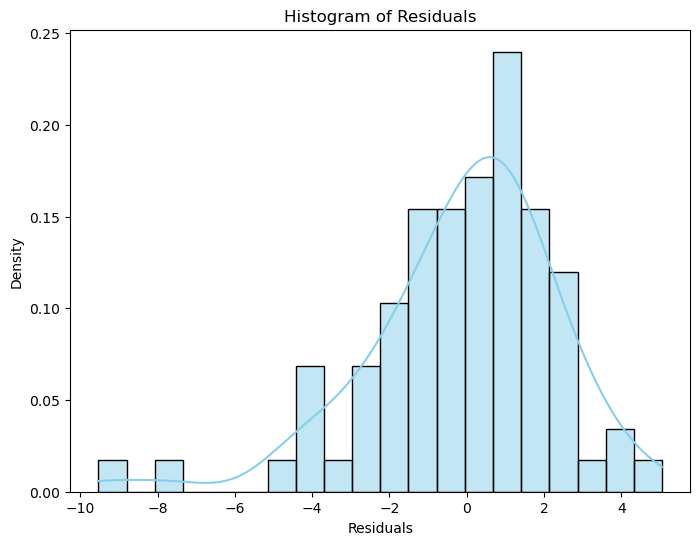

In [160]:
# Check if residuals follow a normal distribution
# Plot histogram of residuals
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, color='skyblue', stat='density', bins=20)
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Density')
plt.show()

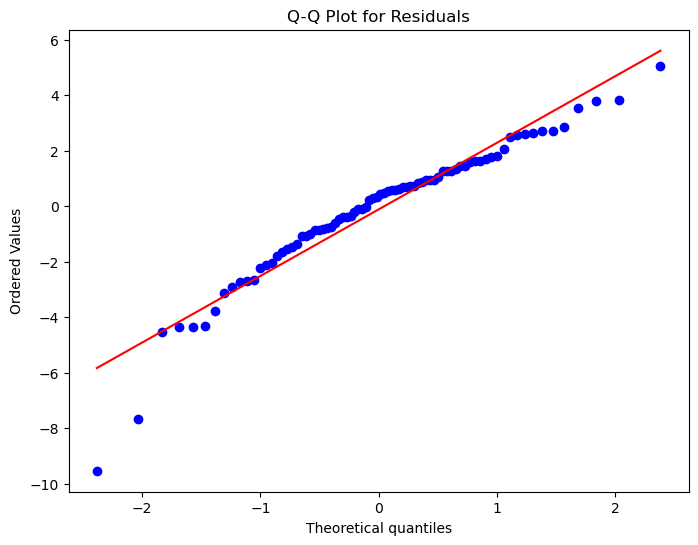

In [161]:
from scipy import stats

# Q-Q plot for normality check
plt.figure(figsize=(8, 6))
stats.probplot(residuals, dist='norm', plot=plt)
plt.title('Q-Q Plot for Residuals')
plt.show()

In [162]:
# Evaluate the model and attribute importance
MSEtrain = mean_squared_error(y_train, y_pred_train)
MSEtest = mean_squared_error(y_test, y_pred_test)

print(f'Mean Squared Error (Train): {MSEtrain}')
print(f'Mean Squared Error (Test): {MSEtest}')

Mean Squared Error (Train): 8.079126402905004e-29
Mean Squared Error (Test): 7.143135496776262e-29


In [164]:
# Feature selection by Backward selection
import statsmodels.api as sm
import pandas as pd

def backward_feature_selection(X, y, threshold_out=0.05):
    included = list(X.columns)
    while True:
        model = sm.OLS(y, sm.add_constant(X[included])).fit()
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max()
        if worst_pval > threshold_out:
            worst_feature = pvalues.idxmax()
            included.remove(worst_feature)
        else:
            break
    return included


# Perform backward feature selection
selected_features = backward_feature_selection(X, y)

print("Selected features:")
print(selected_features)

Selected features:
['Displacement', 'Weight', 'Model Year', 'US Made']


In [165]:
# Feature selection
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import pandas as pd

# Use Recursive Feature Elimination (RFE) with the linear regression model
rfe = RFE(Lmodel, n_features_to_select=3)  # You can adjust the number of features to select
fit = rfe.fit(X, y)

# Print the selected features
selected_features = list(X.columns[fit.support_])
print("Selected features:")
print(selected_features)

Selected features:
['Cylinders', 'Model Year', 'US Made']


In [167]:
# Building linear model using features from the backward selection algorithm

# Subset dataset with necessary columns
cols = ['Displacement', 'Weight', 'Model Year', 'US Made', 'MPG']
datasub = data[cols]

# Assuming 'MPG' is the target variable and 'X' are the features
X1 = datasub.drop('MPG', axis=1)
y1 = datasub['MPG']

# Split the data into training and testing sets (80-20)
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

# Build and fit the linear regression model
Lmodel1 = LinearRegression()
Lmodel1.fit(X1_train,y1_train)

LinearRegression()

print(Lmodel1.score(X1_train,y1_train))
print(Lmodel1.score(X1_test,y1_test))

# Calculate predictions and residuals on the test set
y1_pred = Lmodel1.predict(X1_test)
residuals1 = y1_test - y1_pred

# Calculate adjusted R-squared
n1 = len(y1_test)
p1 = X1_test.shape[1]
r_squared1 = Lmodel1.score(X1_test, y1_test)
adjusted_r_squared1 = 1 - (1 - r_squared1) * (n - 1) / (n - p - 1)
print(f'Adjusted R-squared: {adjusted_r_squared1}')

0.816737340176644
0.840646414996287
Adjusted R-squared: 0.7138878814706062
